<a href="https://colab.research.google.com/github/ashwith-nagendra/IIITH-AIML/blob/main/AIML_Module_4_Lab_1_Perceptron_and_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [72]:
X = np.array([
    [-2, 4],
    [4, 2],
    [1, 6],
    [2, 4],
    [6, 2]
])

In [73]:
X = np.array([
    [-2, 4, -1],
    [4, 2, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [74]:
y = np.array([-1, -1, 1, 1, 1])

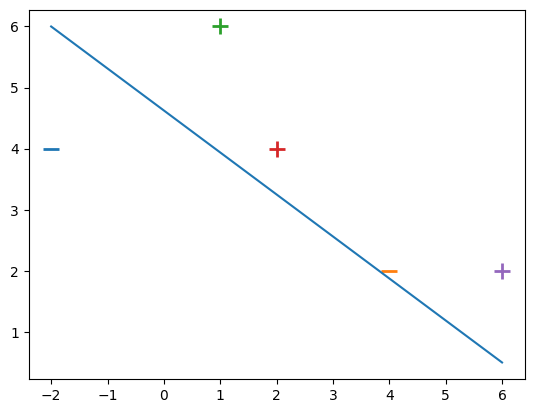

In [75]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

In [76]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [77]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

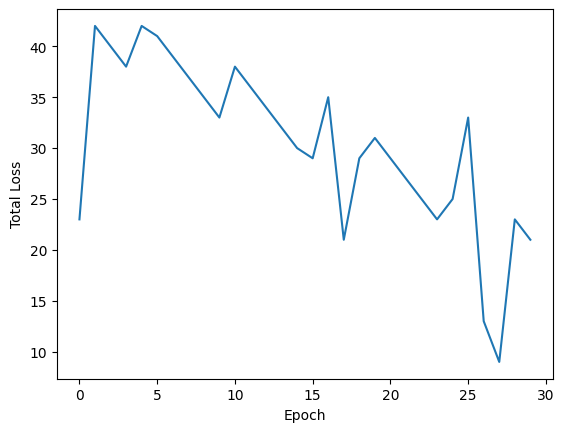

In [65]:
w = perceptron_algo_plot(X, y)

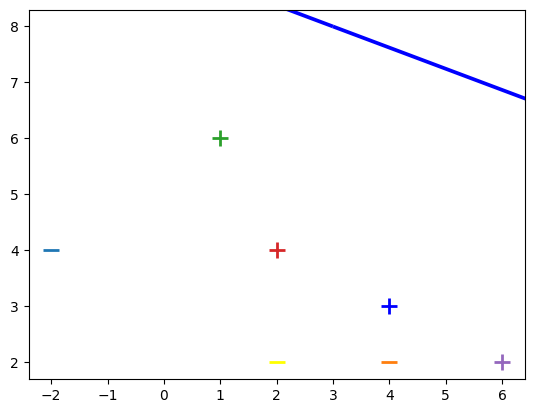

In [78]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

Things to try

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

In [80]:
class Perceptron:
    def __init__(self, learning_rate=0.01, max_iterations=1000):
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.weights = None
        self.bias = 0

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        errors = []
        for epoch in range(self.max_iterations):
            total_error = 0
            for i in range(X.shape[0]):
                # Perceptron rule
                update = y[i] * (np.dot(X[i], self.weights) + self.bias) <= 0
                if update:
                    self.weights += self.learning_rate * y[i] * X[i]
                    self.bias += self.learning_rate * y[i]
                    total_error += 1
            errors.append(total_error)
            # Stop if there are no errors
            if total_error == 0:
                break
        return errors

    def predict(self, X):
        return np.sign(np.dot(X, self.weights) + self.bias)

In [86]:
from sklearn.datasets import load_iris

X, y = make_classification(n_samples=500, n_features=10, n_informative=5, n_classes=2)

# Convert labels to -1 and 1 for the Perceptron
y = 2 * y - 1

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

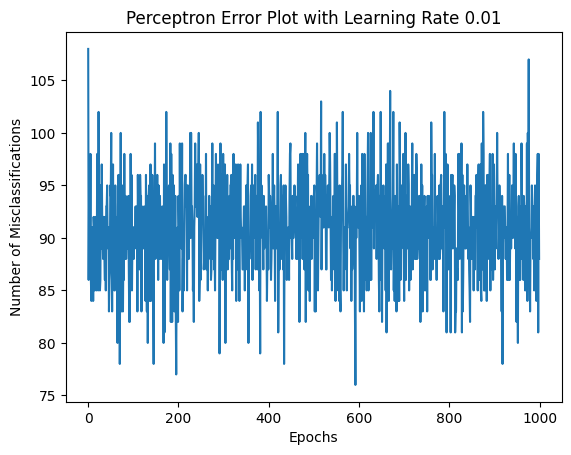

In [85]:
learning_rate = 0.01  # Can be varied
perceptron = Perceptron(learning_rate=learning_rate)
errors = perceptron.fit(X_train, y_train)

# Plot error vs. iterations (epochs)
plt.plot(errors)
plt.title(f"Perceptron Error Plot with Learning Rate {learning_rate}")
plt.xlabel("Epochs")
plt.ylabel("Number of Misclassifications")
plt.show()

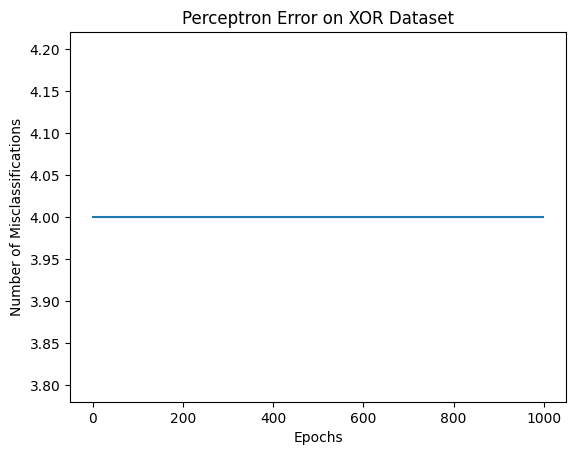

In [84]:
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([-1, 1, 1, -1])  # Labels for XOR, not linearly separable

perceptron = Perceptron(learning_rate=0.1)
errors_xor = perceptron.fit(X_xor, y_xor)

plt.plot(errors_xor)
plt.title("Perceptron Error on XOR Dataset")
plt.xlabel("Epochs")
plt.ylabel("Number of Misclassifications")
plt.show()

In [87]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [88]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 15.]


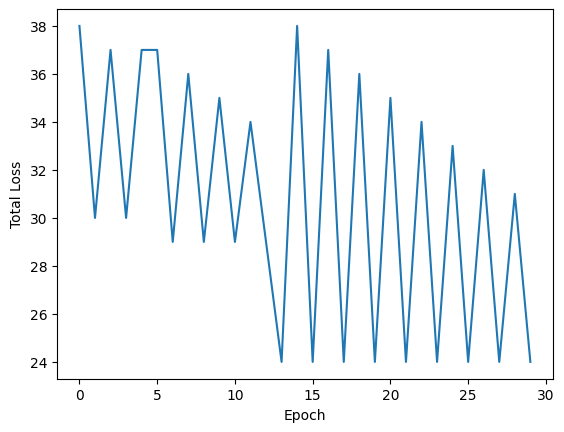

In [89]:
print(perceptron_algo_plot(X, y))